In [1]:
import pandas as pd, numpy as np
import cv2

To check our converter let's plot

In [2]:
def draw_boxes(img, bboxes, classes, text):
    h, w, _ = img.shape
    for i, box in enumerate(bboxes):
        scale_img = [h, w, h, w]
        box = [int(a*b) for a,b in zip(box, scale_img)]
        draw_box(img, classes[i], text, box)

def draw_box(img, cls, text, box):
    hsv = np.array([[[int(cls/float(len(text))*255), 255, 255]]], dtype=np.uint8)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)[0, 0, :]
    bgr = [int(i) for i in bgr]
    cv2.rectangle(img, (box[1], box[0]), (box[3], box[2]), bgr, 2)
    cv2.putText(img, text, (box[1], box[0]), cv2.FONT_HERSHEY_SIMPLEX, 1, bgr)

In [3]:
df = pd.read_csv('data/Anno/annotation_w-o_atr.csv')

In [4]:
img = cv2.imread('data/'+df.loc[0]['Path'])

In [5]:
df.loc[0]['Path']

'img/Sheer_Pleated-Front_Blouse/img_00000001.jpg'

In [6]:
df.loc[0][['x','y', 'width', 'height']].values

array([0.5066666666666667, 0.5866666666666667, 0.5333333333333333,
       0.6466666666666666], dtype=object)

In [7]:
draw_boxes(img, [df.loc[0][['x','y', 'width', 'height']].values], [50], 'Some')

In [8]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

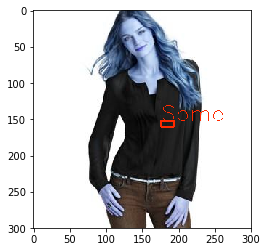

In [9]:
plt.imshow(img)